In [99]:
!pip install -r ../requirements.txt

import sys
sys.path.append('../src')
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
import math
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib as mpl
#import mplhep as hep
#hep.style.use(hep.style.ATLAS)

from selectCleanEvents import *

In [100]:
allevents = pd.read_csv('../analysis_files/run_300_aligned.csv')

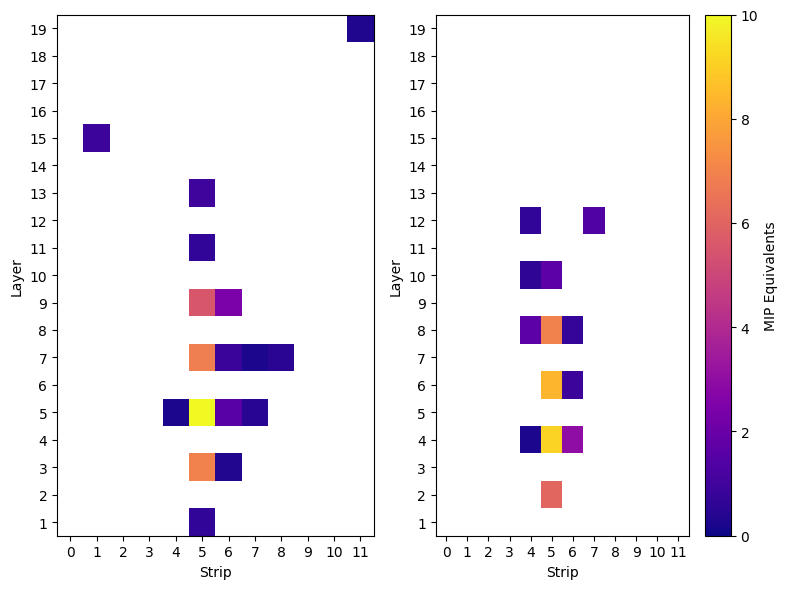

In [101]:
#Select event number here
event = events.loc[events['pf_event'] == 1004]

class Hit:
    def __init__(self,layer,strip,amplitude):
        self.layer = layer
        self.strip = strip
        self.amplitude = amplitude

hits = []

for index, row in event.iterrows():
    layer = row['layer']
    strip = row['strip']
    adc_sum_end0 = row['adc_sum_end0']-800 #Crappy pedestal subtraction
    adc_sum_end1 = row['adc_sum_end1']-800 #Crappy pedestal subtraction
    amplitude = (adc_sum_end0+adc_sum_end1)/2/600 #Crappy MIP equivalent conversion

    hits.append(Hit(layer,strip,amplitude))

fig, axs = plt.subplots(1,2, figsize=(8,6))

cmap = mpl.colormaps['plasma']
saturation_scale = 10 #This number of MIP equivalents saturates the colorbar

#Returns a patch collection with a single Rectangle in it
def make_rec(hit):
    s = hit.strip
    if hit.layer <= 9:
        s += 2
    rec = Rectangle((s, hit.layer-1), 1, 1)

    pc = PatchCollection([rec])
    pc.set_facecolor(cmap(hit.amplitude/saturation_scale))

    return pc

def draw_hit(hit):

    if hit.amplitude > 0.25:
    
        if hit.layer % 2 == 1:
            pc = make_rec(hit)
            axs[0].add_collection(pc)
        else:
            pc = make_rec(hit)
            axs[1].add_collection(pc)

for hit in hits:
    draw_hit(hit)

#Axis labeling
axs[0].set_xlim(0,12)
axs[0].set_ylim(0,19)
axs[1].set_xlim(0,12)
axs[1].set_ylim(0,19)
axs[0].set_xlabel("Strip")
axs[1].set_xlabel("Strip")
axs[0].set_ylabel("Layer")
axs[1].set_ylabel("Layer")
axs[0].set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])
axs[0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11])
axs[1].set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])
axs[1].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11])
axs[0].set_yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5])
axs[0].set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
axs[1].set_yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5])
axs[1].set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0,vmax=saturation_scale), cmap=cmap), ax=axs[1], label="MIP Equivalents")

plt.tight_layout()

plt.show()